# Multi-Class Obesity Risk Prediction Using Various ML Models

This project aims to build a machine learning model to predict obesity risk levels based on personal and lifestyle data. The classification problem is multi-class, where the objective is to classify individuals into different categories of obesity, such as Normal Weight, Overweight, or various levels of Obesity (Type I, II, III).



### Dataset Description:
The dataset provided for the "Multi-Class Prediction of Obesity Risk" project is derived from a deep learning model trained on the original "Obesity or CVD Risk" dataset. It contains various personal, lifestyle, and health-related features aimed at predicting obesity risk levels. The dataset includes both categorical and numerical variables. Key features in the dataset are:

- **ID**: Unique identifier for each individual.
- **Gender**: Categorical feature indicating gender (Male/Female).
- **Age**: Age of the individual.
- **Height**: Height in meters.
- **Weight**: Weight in kilograms.
- **Family History with Overweight**: Categorical feature indicating whether the individual has a family history of being overweight (yes/no).
- **FAVC**: Indicates if the individual frequently consumes high-calorie food (yes/no).
- **FCVC**: Frequency of vegetable consumption.
- **NCP**: Number of main meals consumed per day.
- **CAEC**: Frequency of eating between meals (Sometimes, Frequently, Always).
- **SMOKE**: Smoking habit (yes/no).
- **CH2O**: Daily water consumption in liters.
- **SCC**: Monitors calorie consumption (yes/no).
- **FAF**: Frequency of physical activity per week.
- **TUE**: Time spent on technology (hours/day).
- **CALC**: Frequency of alcohol consumption (Sometimes, Frequently, Always).
- **MTRANS**: Mode of transportation (Automobile, Public Transport, Walking, etc.).
- **NObeyesdad**: Target variable indicating the obesity risk level (e.g., Normal Weight, Overweight, Obesity Type I/II/III).

The dataset is designed for multi-class classification, with the target variable `NObeyesdad` containing different categories of obesity risk levels. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder , StandardScaler


from sklearn.ensemble import RandomForestClassifier  ,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier  # Multilayer Perceptron for neural networks
from sklearn.ensemble import AdaBoostClassifier  # Boosting classifier
from sklearn.ensemble import BaggingClassifier  # Bagging classifier
from lightgbm import LGBMClassifier  # LightGBM model



In [2]:
sns.set(style="whitegrid")


### Explore Data

In [3]:
#load training data
df_train=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")

In [4]:
#load testing  data
df_test=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

###### read dataset 

In [5]:
#head data
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
#last data
df_train.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [7]:
#sample  data
df_train.sample(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1336,1336,Male,30.02019,1.751691,112.010504,yes,yes,1.626369,3.0,Sometimes,no,2.041536,no,0.935217,0.000000,Sometimes,Automobile,Obesity_Type_II
14564,14564,Female,26.00000,1.657820,111.956110,yes,yes,3.000000,3.0,Sometimes,no,2.770125,no,0.000000,0.153669,Sometimes,Public_Transportation,Obesity_Type_III
14995,14995,Male,18.00000,1.806710,108.800964,yes,yes,2.000000,3.0,Sometimes,no,2.000000,no,1.000000,1.731070,no,Public_Transportation,Obesity_Type_I
7554,7554,Male,25.01277,1.828276,118.377601,yes,yes,2.766612,3.0,Sometimes,no,1.000000,no,1.055450,0.078207,Sometimes,Public_Transportation,Obesity_Type_II
4134,4134,Male,20.00000,1.700000,55.300000,yes,yes,2.000000,3.0,Frequently,no,2.000000,no,3.000000,2.000000,Sometimes,Public_Transportation,Insufficient_Weight


In [8]:
#shape dataset
df_train.shape

(20758, 18)

In [9]:
#name columns
df_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
# informatoin about datset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [11]:
#check is null
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
#check is dubplicated
df_train.duplicated().sum()

0

In [13]:
# Summary statistics for numerical features
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [14]:
# Summary  for categorical features
df_train.describe(include="object")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


###### Transformation dataset

In [15]:
# Select object-type columns
object_columns = df_train.select_dtypes(include="object")
non_object_columns = df_train.select_dtypes(exclude="object")


In [16]:
#show object_columns dataset
object_columns.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
#show non_object_columns dataset
non_object_columns.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721


In [18]:
#find count unique values in each column objec
for col in object_columns.columns:
    print(f"column {col} : ")
    uniq_values=df_train[col].value_counts()
    print(uniq_values)
    
    print("_"*30)
    print('')

column Gender : 
Gender
Female    10422
Male      10336
Name: count, dtype: int64
______________________________

column family_history_with_overweight : 
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
______________________________

column FAVC : 
FAVC
yes    18982
no      1776
Name: count, dtype: int64
______________________________

column CAEC : 
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
______________________________

column SMOKE : 
SMOKE
no     20513
yes      245
Name: count, dtype: int64
______________________________

column SCC : 
SCC
no     20071
yes      687
Name: count, dtype: int64
______________________________

column CALC : 
CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64
______________________________

column MTRANS : 
MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motor

In [19]:
#label encoder to enocde data
label=LabelEncoder()

In [20]:
#encoded data categorical with label encoder
for col in object_columns.columns:
    df_train[col]=label.fit_transform(df_train[col])

In [21]:
#check data
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


In [22]:
#and check data type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

###### and now will apply  StandardScaler on data numrical

In [23]:
#  StandardScaler 

scaler = StandardScaler()


In [24]:
#check disction data numrical before StandardScaler
df_train[non_object_columns.columns].describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [25]:
# Standardize numerical columns except 'id'
columns_to_scale = non_object_columns.drop(columns=['id'])
df_train[columns_to_scale.columns] = scaler.fit_transform(columns_to_scale)

In [26]:
#check disction data numrical after StandardScaler
df_train.describe()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758.000000,2.075800e+04,2.075800e+04,2.075800e+04,20758.000000,20758.000000,2.075800e+04,2.075800e+04,20758.000000,20758.000000,2.075800e+04,20758.000000,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000
mean,10378.50000,0.497929,1.889486e-16,-1.107677e-15,-1.297310e-16,0.819636,0.914443,1.095354e-16,1.762836e-17,1.848299,0.011803,-2.931785e-16,0.033096,3.902200e-17,1.328117e-16,1.223239,2.506841,2.991473
std,5992.46278,0.500008,1.000024e+00,1.000024e+00,1.000024e+00,0.384500,0.279716,1.000024e+00,1.000024e+00,0.449036,0.108000,1.000024e+00,0.178891,1.000024e+00,1.000024e+00,0.473690,1.148730,1.893176
min,0.00000,0.000000,-1.730295e+00,-2.866172e+00,-1.853297e+00,0.000000,0.000000,-2.711729e+00,-2.497077e+00,0.000000,0.000000,-1.691863e+00,0.000000,-1.171141e+00,-1.024344e+00,0.000000,0.000000,0.000000
25%,5189.25000,0.000000,-6.754304e-01,-7.832905e-01,-8.297482e-01,1.000000,1.000000,-8.362790e-01,3.383641e-01,2.000000,0.000000,-3.901641e-01,0.000000,-1.161583e+00,-1.024344e+00,1.000000,3.000000,1.000000
50%,10378.50000,0.000000,-1.804501e-01,-2.805357e-03,-1.449229e-01,1.000000,1.000000,-9.765730e-02,3.383641e-01,2.000000,0.000000,-4.834930e-02,0.000000,2.177483e-02,-7.119963e-02,1.000000,3.000000,3.000000
75%,15567.75000,1.000000,3.794339e-01,7.174689e-01,8.989331e-01,1.000000,1.000000,1.039171e+00,3.383641e-01,2.000000,0.000000,8.549540e-01,0.000000,7.225010e-01,6.365129e-01,1.000000,3.000000,4.000000
max,20757.00000,1.000000,6.532810e+00,3.154492e+00,2.925436e+00,1.000000,1.000000,1.039171e+00,1.756085e+00,3.000000,1.000000,1.595165e+00,1.000000,2.407607e+00,2.297369e+00,2.000000,4.000000,6.000000


<Axes: xlabel='NObeyesdad'>

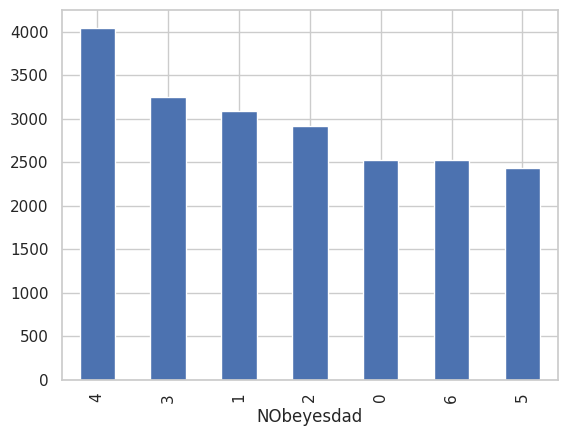

In [27]:
#plot distbution NObeyesdad
df_train['NObeyesdad'].value_counts().plot(kind='bar')

### Modeling

In [28]:
# Split data into features and target variable
x=df_train.drop(['NObeyesdad','id'],axis=1)
y=df_train['NObeyesdad']

In [29]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [30]:
# Check the shapes 
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (18682, 16)
Testing set features shape: (2076, 16)
Training set target shape: (18682,)
Testing set target shape: (2076,)


In [31]:
def compare_models(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'XGBoost': XGBClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'SVM': SVC(probability=True),  # Enable probability estimates for some models
        'Naive Bayes': GaussianNB(),
        'MLP': MLPClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'Bagging': BaggingClassifier(),
        'LightGBM': LGBMClassifier()
    }
    
    # To save results
    result = {}
    for name, model in models.items():
        model.fit(X_train, y_train)  # Train the model
        prediction = model.predict(X_test)  # Predict X_test
        
        # Metrics
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction, average='weighted')
        recall = recall_score(y_test, prediction, average='weighted')
        f1 = f1_score(y_test, prediction, average='weighted')
        
        result[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
        
    result_df = pd.DataFrame(result).T
    return result_df

In [32]:
# use function to compare model
result_for_compraing=compare_models(X_train, X_test, y_train, y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2019
[LightGBM] [Info] Number of data points in the train set: 18682, number of used features: 16
[LightGBM] [Info] Start training from score -2.108662
[LightGBM] [Info] Start training from score -1.915233
[LightGBM] [Info] Start training from score -1.953001
[LightGBM] [Info] Start training from score -1.859064
[LightGBM] [Info] Start training from score -1.635028
[LightGBM] [Info] Start training from score -2.146860
[LightGBM] [Info] Start training from score -2.105141


In [33]:
result_for_compraing

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.859345,0.859780,0.859345,0.858929
Decision Tree,0.839114,0.841296,0.839114,0.839926
Random Forest,0.904624,0.905212,0.904624,0.904872
Gradient Boosting,0.906069,0.906689,0.906069,0.906343
XGBoost,0.909441,0.910033,0.909441,0.909671
K-Nearest Neighbors,0.763006,0.761126,0.763006,0.760056
SVM,0.873796,0.876412,0.873796,0.874421
Naive Bayes,0.660886,0.668494,0.660886,0.645001
MLP,0.877649,0.878750,0.877649,0.877423
AdaBoost,0.454239,0.399636,0.454239,0.390369


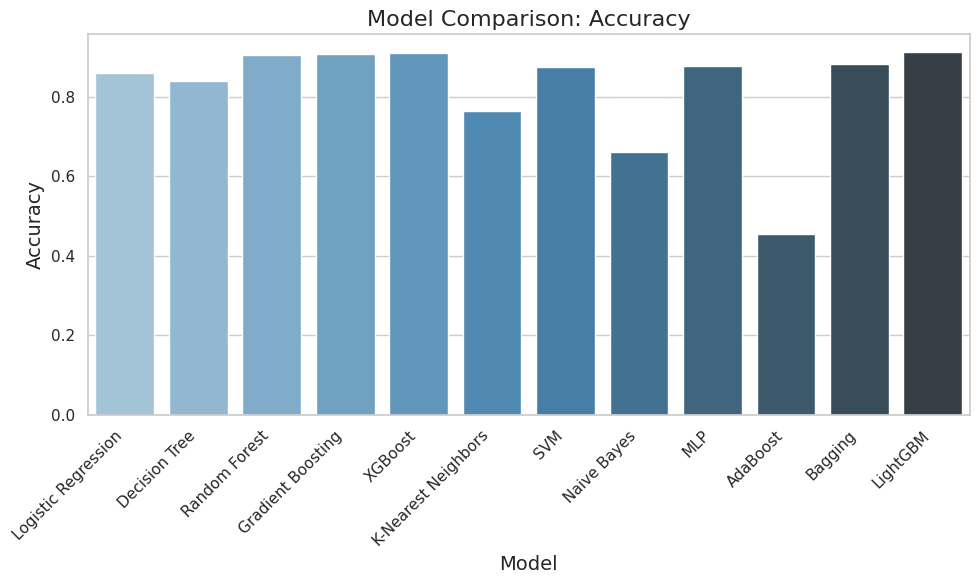

In [34]:
# Plot Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=result_for_compraing.index, y='Accuracy', data=result_for_compraing, palette="Blues_d")
plt.title('Model Comparison: Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

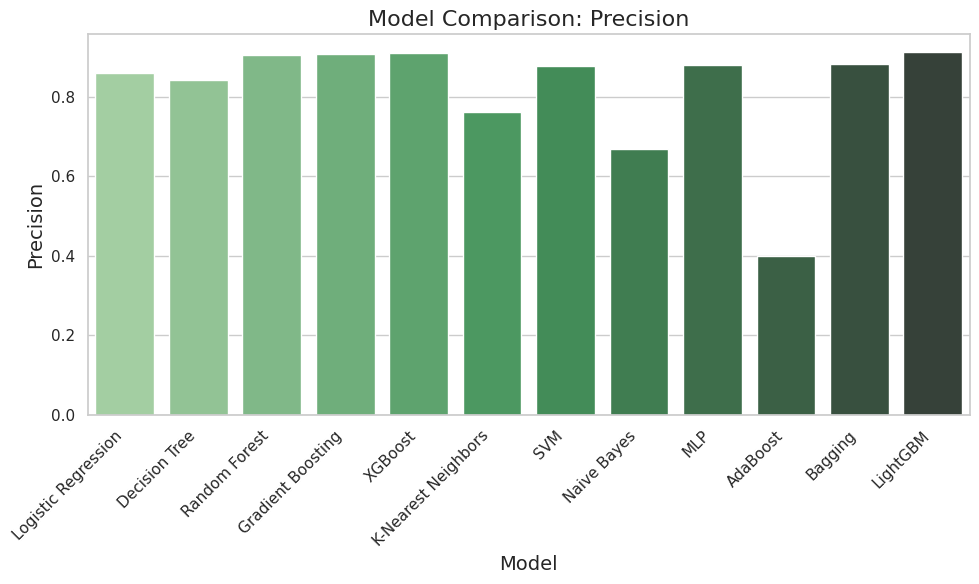

In [35]:
# Plot Precision
plt.figure(figsize=(10, 6))
sns.barplot(x=result_for_compraing.index, y='Precision', data=result_for_compraing, palette="Greens_d")
plt.title('Model Comparison: Precision', fontsize=16)
plt.ylabel('Precision', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

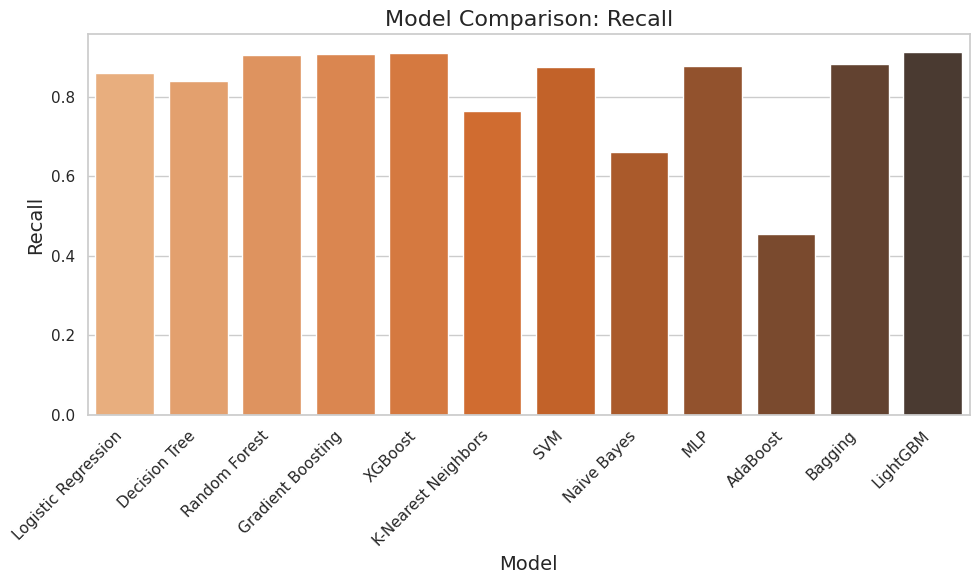

In [36]:
# Plot Recall
plt.figure(figsize=(10, 6))
sns.barplot(x=result_for_compraing.index, y='Recall', data=result_for_compraing, palette="Oranges_d")
plt.title('Model Comparison: Recall', fontsize=16)
plt.ylabel('Recall', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


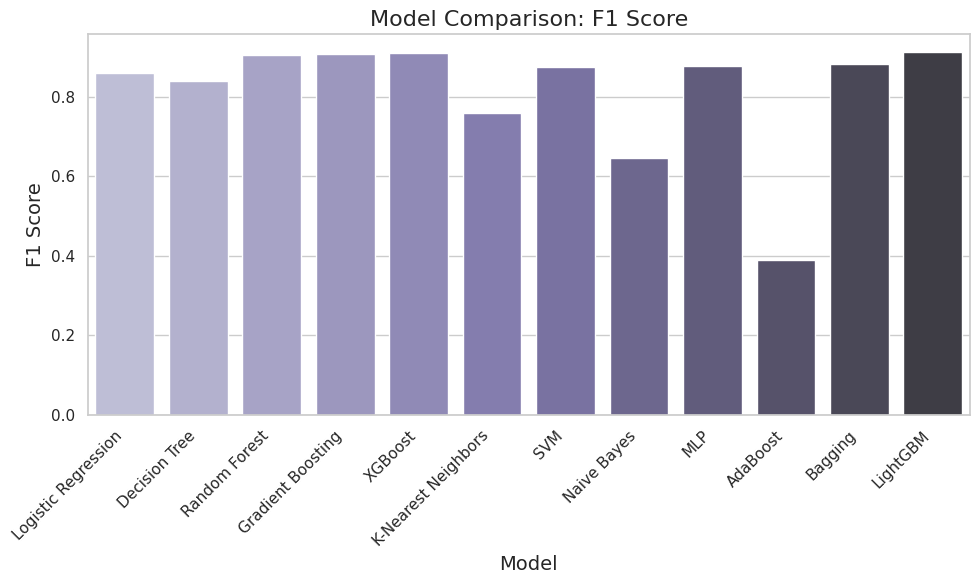

In [37]:
# Plot F1 Score
plt.figure(figsize=(10, 6))
sns.barplot(x=result_for_compraing.index, y='F1 Score', data=result_for_compraing, palette="Purples_d")
plt.title('Model Comparison: F1 Score', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
df_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [39]:
# Find  model with  highest accuracy
best_model_name = result_for_compraing['Accuracy'].idxmax()

print(f"The best model based on Accuracy is: {best_model_name}")

#  dictionary of  models 
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'LightGBM': LGBMClassifier()
}

# Select  best model from  models
best_model = models[best_model_name]
best_model.fit(X_train , y_train)
print(best_model)

The best model based on Accuracy is: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2019
[LightGBM] [Info] Number of data points in the train set: 18682, number of used features: 16
[LightGBM] [Info] Start training from score -2.108662
[LightGBM] [Info] Start training from score -1.915233
[LightGBM] [Info] Start training from score -1.953001
[LightGBM] [Info] Start training from score -1.859064
[LightGBM] [Info] Start training from score -1.635028
[LightGBM] [Info] Start training from score -2.146860
[LightGBM] [Info] Start training from score -2.105141
LGBMClassifier()


###### Now apply  same preprocessing to df_test as  did for df_train, f

In [40]:
# Initialize and fit the LabelEncoder on training labels
label = LabelEncoder()
label.fit(df_train['NObeyesdad'])

# Encode training and testing labels
df_train['NObeyesdad'] = label.transform(df_train['NObeyesdad'])


In [41]:
# Select object-type columns
object_columns_t = df_test.select_dtypes(include="object")
non_object_columns_t = df_test.select_dtypes(exclude="object")



#encoded data categorical with label encoder
for col in object_columns_t.columns:
    df_test[col]=label.fit_transform(df_test[col])


In [42]:
#  StandardScaler 

scaler = StandardScaler()

# Standardize numerical columns except 'id'
columns_to_scale = non_object_columns_t.drop(columns=['id'])
df_test[columns_to_scale.columns] = scaler.fit_transform(columns_to_scale)

###### Predicted testing dataset

In [43]:
X_test = df_test.drop(columns=['id'])  # Drop 'id' column for prediction

In [44]:
predictions = best_model.predict(X_test)##Predict using  best model


In [45]:
# Create a DataFrame with  'id' and predictions
results = pd.DataFrame({
    'id': df_test['id'],
    'NObeyesdad': predictions
})


In [46]:
mapping_dict = {
    4: 'Obesity_Type_III',
    3: 'Obesity_Type_II',
    1: 'Normal_Weight',
    2: 'Obesity_Type_I',
    0: 'Insufficient_Weight',
    6: 'Overweight_Level_II',
    5: 'Overweight_Level_I'
}
results['NObeyesdad'] = results['NObeyesdad'].map(mapping_dict)


In [47]:
# Save  results to 'submission.csv'
results.to_csv('submission.csv', index=False)